In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import  SVR

In [2]:
df_original = pd.read_csv('homework.csv')

In [3]:
df_original.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
df_original.info()
# нет пустых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


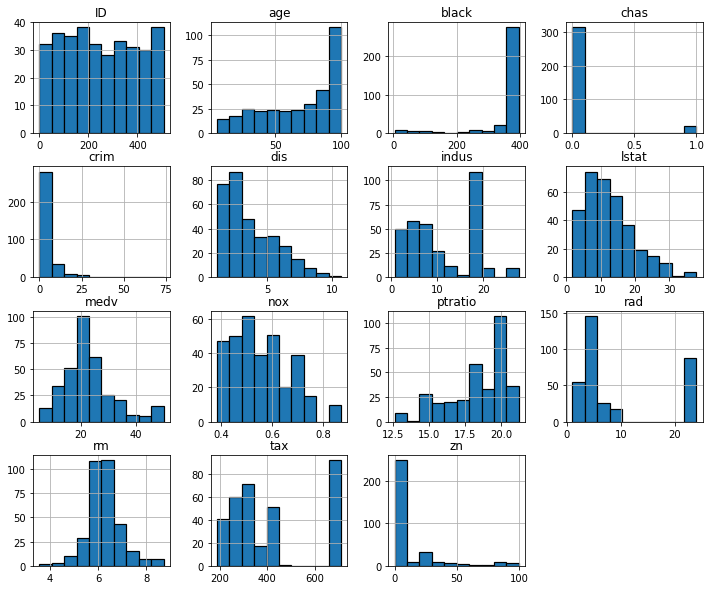

In [5]:
df_original.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

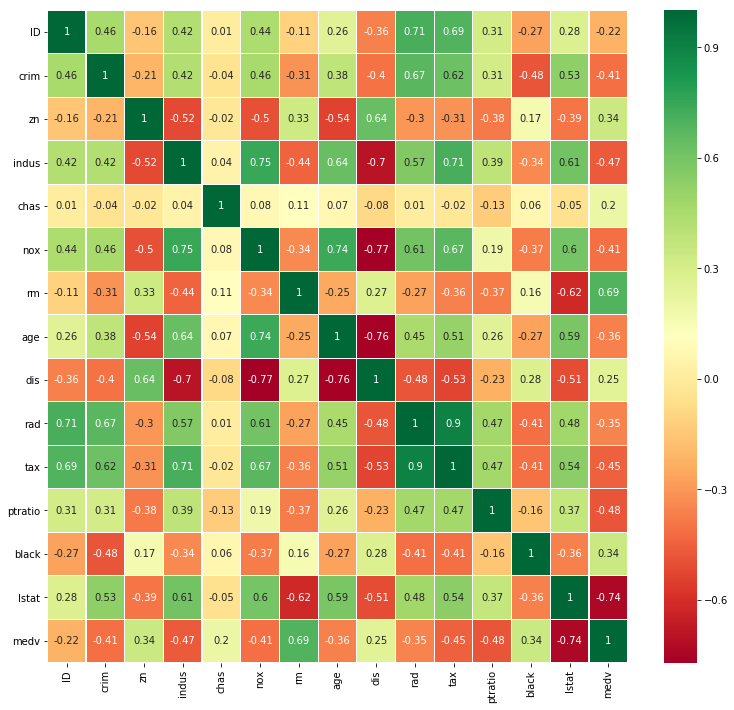

In [6]:
correlation_matrix = df_original.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

In [58]:
# уберем данные, которые сильно коррелируют между собой, я убрала один из пары коррелирующих столбцов, 
# где коэффициент корреляции > 0,7
df = df_original[['crim','zn','indus', 'chas','rm', 'age', 'tax', 'ptratio', 'black', 'lstat', 'medv']]

In [8]:
df.head()

,crim,zn,indus,chas,rm,age,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,6.575,65.2,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,6.998,45.8,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,7.147,54.2,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,6.012,66.6,311,15.2,395.60,12.43,22.9


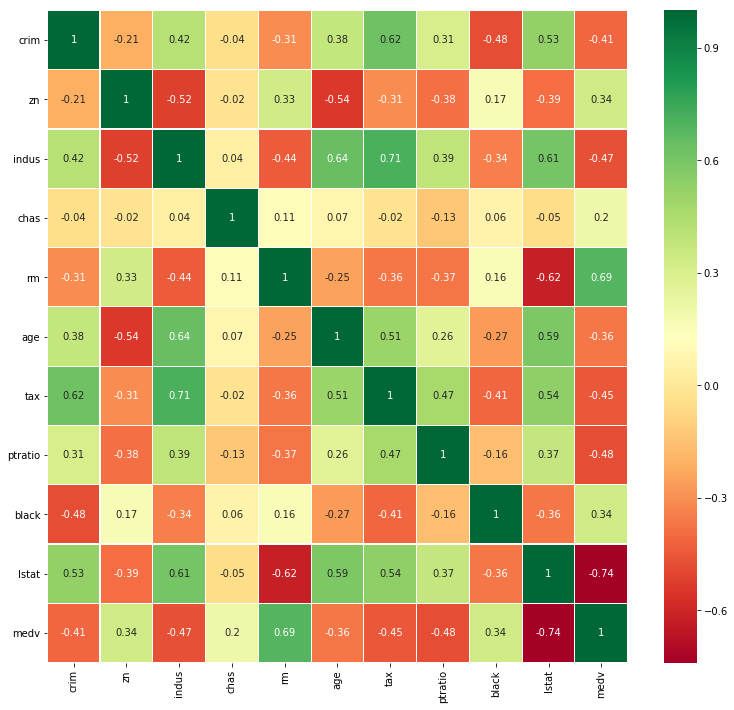

In [9]:
correlation_matrix = df.corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(13,12)
plt.show()

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.fit_transform(y_test.reshape(-1,1))

Линейная регрессия

In [13]:
LR = LinearRegression()

In [14]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = LR.predict(X_test)

In [16]:
mean_squared_error(y_test, y_pred)

0.4381734410342036

In [17]:
r2_score(y_test, y_pred)

0.5618265589657964

In [18]:
mean_absolute_error(y_test, y_pred)

0.35424330512776087

SVR

In [52]:
svr = SVR()


In [53]:
svr.fit(X_train, y_train)

/home/igreevaveronika/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
y_pred = svr.predict(X_test)

In [55]:
mean_squared_error(y_test, y_pred)

0.3074825930787401

In [56]:
r2_score(y_test, y_pred)

0.6925174069212598

In [57]:
mean_absolute_error(y_test, y_pred)

0.3129848707072013

DecisionTreeRegressor

In [25]:
DTR = DecisionTreeRegressor()

In [26]:
DTR.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [27]:
y_pred = svr.predict(X_test)

In [28]:
mean_squared_error(y_test, y_pred)

0.3074825930787401

In [29]:
r2_score(y_test, y_pred)

0.6925174069212598

In [30]:
mean_absolute_error(y_test, y_pred)

0.3129848707072013